# This notebook will cover the parameterization of chitin polymers
Parameterization is carried out using AmberTools and GAFF (generalized amber forcefield)

# Importing python modules

The first module to import is **sw_directories** so we can use the **SnippetSimManage** class.

The second module to import is **sw_build_systems** so we can use the **BuildAmberSystems** class. 

The preceeding tutorials explain these python classes and how to use them.

In [1]:
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

# Setting up *Manager* and *Builder* classes

In [2]:
# Retrieve the path to our main directory
main_dir = os.getcwd()

# Pass this main directory to the SnippetSimManage class and assign it an appropriate variable name.
manager = SnippetSimManage(main_dir)

In [3]:
# Set up the builder by passing the manager to the "BuildAmberSystems" class
builder = BuildAmberSystems(manager)

Now we can generate the chitin trimer

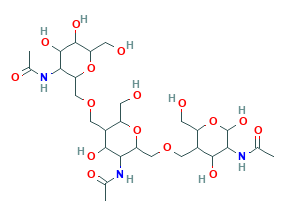

In [4]:
# Method to build a pdb file for the trimer and generate a residue code for it
builder.SmilesToPDB_GenResCode('CC(=O)NC1C(OC(C(C1O)COCC2C(C(C(C(O2)CO)O)O)NC(=O)C)CO)COCC3C(OC(C(C3O)NC(=O)C)O)CO', 'chitin_trimer')

In [5]:
# Now we can check if this .pdb file exists using a method from tutorial 1
pdb_file = manager.load_pdb_filepath("chitin_trimer")

# Print the pdb filepath
print(pdb_file)

/home/dan/polymersimulator/pdb_files/chitin_trimer.pdb


Now we need to parameterize the chitin trimer

In [6]:
# Parameterize the chitin trimer
builder.parameterize_mol("chitin_trimer")

Output: 
Welcome to antechamber 22.0: molecular input file processor.

Info: acdoctor mode is on: check and diagnose problems in the input file.
Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

-- Check Format for pdb File --
   Status: pass
Info: Determining atomic numbers from atomic symbols which are case sensitive.
-- Check Unusual Elements --
   Status: pass
-- Check Open Valences --
   Status: pass
-- Check Geometry --
      for those bonded   
      for those not bonded   
   Status: pass
-- Check Weird Bonds --
   Status: pass
-- Check Number of Units --
   Status: pass
acdoctor mode has completed checking the input file.

Running: /home/dan/miniconda3/envs/AmberTools23/bin/bondtype -j full -i ANTECHAMBER_BOND_TYPE.AC0 -o ANTECHAMBER_BOND_TYPE.AC -f ac

Running: /home/dan/miniconda3/envs/AmberTools23/bin/atomtype -i ANTECHAMBER_AC.AC0 -o ANTECHAMBER_AC.AC -p gaff
Info: Total number of electrons: 366; net ch

Now we need to generate polymeric unit residue codes

In [7]:
# Method for generating residue codes for different polymeric units - pass a trimer that has a residue code assigned
builder.GenRescode_4_PolyUnits("chitin_trimer")

Head code assigned:  hDH
Mainchain code assigned:  mDH
Tail code assigned:  tDH


In [8]:
# Check if the chitin trimer was parameterized by seeing if the mol2 file was generated
output = manager.load_mol2_filepath("chitin_trimer")
output

'/home/dan/polymersimulator/pdb_files/molecules/chitin_trimer/chitin_trimer.mol2'

Now we need to load the molecule in xleap and see what atoms need to be contained in the text files that will be passed to prepgen

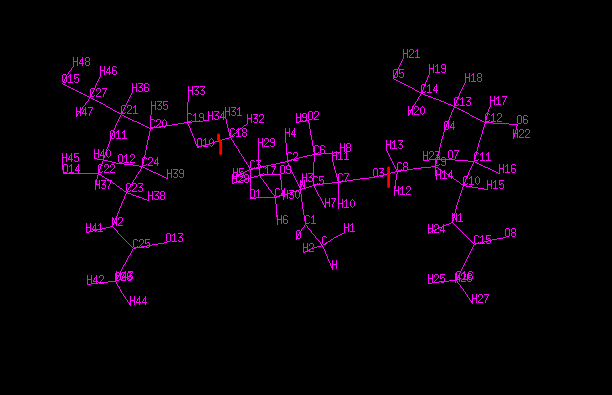

This is rather quite difficult - but mainly because the atom number are very hard to see.